In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import scipy
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

In [2]:
FILE_PATH = 'data/pilot4.json'
#pilot3.json has 10 anagrams -- each subject sees three anagrams randomly -- possible confound of ordering effects
#pilot4.json has 15 anagrams -- each subject only sees 1 anagram randomly. 
all_entries = []
with open(FILE_PATH) as file:
    for line in file:
        entry = json.loads(line)
        all_entries.append(entry)
len(all_entries)

390

In [3]:
start = []
finish = []
for entry in all_entries:
    if isinstance(entry['data'], dict):
        condition = entry['data']
        start.append(entry)
    else:
        condition = entry['data'][0]
        finish.append(entry)
print(len(start),len(finish))

def return_indices(user_order): #function that searches through the list of anagrams and returns the indices of the anagrams seen by the subject
    order = ['TEH', 'CTA', 'BLEL', 'SROT', 'WROD', 'PITN', 'SONW', 'VLVOO', 'PONHE', 'PREOK', 'YJAKWLA', 'KHAOMCM', 'IORCNAG', 'DALRBEU', 'HNATUYG']
    idx = []
    idx.append(order.index(user_order))
    return idx

221 169


In [4]:
#get subject data for the 15 anagrams

time_guess = [[] for i in range(15)] 
actual_rt = [[] for i in range(15)]
give_up = [[] for i in range(15)]
aha = [[] for i in range(15)]

for entry in finish: 
    entry_data = entry['data']
    idx = return_indices((entry_data[0]['anagrams_seen'])) #get the indices of the anagrams seen by the subject
    anagrams_answers = entry_data[0]['anagrams_answers']
    time_guess[idx[0]].append(entry_data[5]['response']) #5 is first time estimation
    
    counter = 6    
    rt = entry_data[6]['rt']
    attempt = entry_data[6]['responses'] 
    g = 0
    while anagrams_answers.lower() not in attempt.lower(): #keep incrementing until person gets correct answer or gives up        
        if "next" in attempt.lower(): #break if person gave up            
            g = 1
            break
        else:                
            counter = counter+1
            attempt = entry_data[counter]['responses']
            rt = rt+entry_data[counter]['rt']  
            
    give_up[idx[0]].append(g) #did subject give up or not
    actual_rt[idx[0]].append(rt) #append actual time to complete

    counter = counter+1    
    r = entry_data[counter]['responses'] #aha rating
    aha[idx[0]].append(int(r[6]))


In [5]:
#data conversion, clean-up, and storage here

mean_time_guess = []
mean_rt = []
mean_tpe = []
mean_aha = []
for i in range(15): #go through all 15 anagrams here
    give_up_i = give_up[i]
    aha_i = aha[i]    
    time_guess_i = np.asarray(time_guess[i], dtype='float64')*30 
    actual_rt_i = np.asarray(actual_rt[i], dtype='float64')*0.001  
    tpe_i = time_guess_i-actual_rt_i
    
    indexes = [i for i,x in enumerate(give_up_i) if x == 0] #only get subjects who solved the anagram    
    aha_i = np.asarray(aha_i)
    aha_i = aha_i[np.asarray(indexes)] 
    time_guess_i = time_guess_i[np.asarray(indexes)] 
    actual_rt_i = actual_rt_i[np.asarray(indexes)] 
    tpe_i = tpe_i[np.asarray(indexes)]
    
    mean_time_guess.append(np.mean(time_guess_i/60))
    mean_rt.append(np.mean(actual_rt_i/60))
    mean_tpe.append(np.mean(tpe_i/60))
    mean_aha.append(np.mean(aha_i))
    
    print('Time guess:', np.mean(time_guess_i), 'Actual RT:',np.mean(actual_rt_i), 'TPE:', np.mean(tpe_i), 'AHA:',np.mean(aha_i), 'numSubs:', len(aha_i))
    
    


Time guess: 3.33333333333 Actual RT: 4.80322222222 TPE: -1.46988888889 AHA: 3.0 numSubs: 9
Time guess: 3.64285714286 Actual RT: 8.208 TPE: -4.56514285714 AHA: 2.78571428571 numSubs: 14
Time guess: 20.625 Actual RT: 5.61525 TPE: 15.00975 AHA: 4.1875 numSubs: 16
Time guess: 50.3333333333 Actual RT: 27.4318888889 TPE: 22.9014444444 AHA: 2.77777777778 numSubs: 9
Time guess: 33.0 Actual RT: 6.03977777778 TPE: 26.9602222222 AHA: 3.94444444444 numSubs: 18
Time guess: 24.0 Actual RT: 8.28871428571 TPE: 15.7112857143 AHA: 3.71428571429 numSubs: 7
Time guess: 6.5 Actual RT: 5.8 TPE: 0.7 AHA: 4.33333333333 numSubs: 6
Time guess: 100.666666667 Actual RT: 14.3877777778 TPE: 86.2788888889 AHA: 4.44444444444 numSubs: 9
Time guess: 30.75 Actual RT: 6.927 TPE: 23.823 AHA: 4.0 numSubs: 12
Time guess: 97.0 Actual RT: 29.0103333333 TPE: 67.9896666667 AHA: 3.66666666667 numSubs: 6
Time guess: 102.666666667 Actual RT: 31.9541111111 TPE: 70.7125555556 AHA: 4.33333333333 numSubs: 9
Time guess: 112.333333333 A

         aha anagrams        rt       tpe
0   3.000000      TEH  0.080054 -0.024498
1   2.785714      CTA  0.136800 -0.076086
2   4.187500     BLEL  0.093587  0.250163
3   2.777778     SROT  0.457198  0.381691
4   3.944444     WROD  0.100663  0.449337
5   3.714286     PITN  0.138145  0.261855
6   4.333333     SONW  0.096667  0.011667
7   4.444444    VLVOO  0.239796  1.437981
8   4.000000    PONHE  0.115450  0.397050
9   3.666667    PREOK  0.483506  1.133161
10  4.333333  YJAKWLA  0.532569  1.178543
11  5.111111  KHAOMCM  0.618943  1.253280
12  4.375000  IORCNAG  0.673902  0.838598
13  4.000000  DALRBEU  0.596650  1.128350
14  4.500000  HNATUYG  1.288608  0.861392
[[ 1.          0.61062029]
 [ 0.61062029  1.        ]]
[[ 1.          0.38781903]
 [ 0.38781903  1.        ]]
[[ 1.          0.58560183]
 [ 0.58560183  1.        ]]
[[ 1.          0.93097406]
 [ 0.93097406  1.        ]]


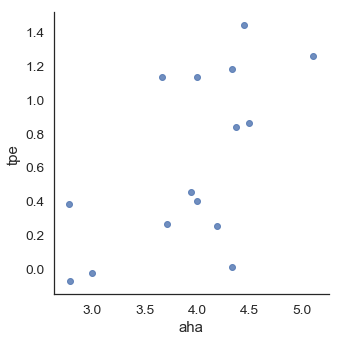

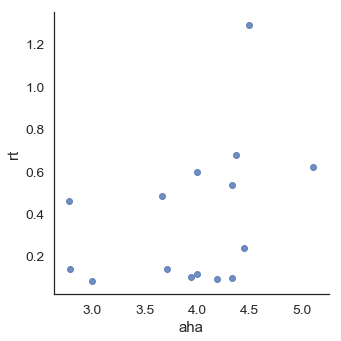

In [6]:
import seaborn as sns
import pandas as pd
sns.set(style="white", font_scale=1.25)

df = pd.DataFrame({'anagrams': ['TEH', 'CTA', 'BLEL', 'SROT', 'WROD', 'PITN', 'SONW', 'VLVOO', 'PONHE', 'PREOK', 'YJAKWLA', 'KHAOMCM', 'IORCNAG', 'DALRBEU', 'HNATUYG'],
    'tpe': mean_tpe,
    'aha': mean_aha,
     'rt':  mean_rt})
print(df)
sns.lmplot('aha', 'tpe', data=df, fit_reg=False)
sns.lmplot('aha', 'rt', data=df, fit_reg=False)

print(np.corrcoef(mean_tpe, mean_aha))
print(np.corrcoef(mean_rt, mean_aha))
print(np.corrcoef(mean_time_guess, mean_aha))
print(np.corrcoef(mean_time_guess, mean_tpe))

{"q0":"rots"}
sort
